In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
#load datasets
train_10k = pd.read_csv('train_downsampled_10k.csv')
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [3]:
# Drop unnecessary features
train_10k = train_10k.drop(['date_time'], axis=1)
train_10k = train_10k.drop(['srch_ci'], axis=1)
train_10k = train_10k.drop(['srch_co'], axis=1)

train_11k = train_11k.drop(['date_time'], axis=1)
train_11k = train_11k.drop(['srch_ci'], axis=1)
train_11k = train_11k.drop(['srch_co'], axis=1)

train_12k = train_12k.drop(['date_time'], axis=1)
train_12k = train_12k.drop(['srch_ci'], axis=1)
train_12k = train_12k.drop(['srch_co'], axis=1)

train_13k = train_13k.drop(['date_time'], axis=1)
train_13k = train_13k.drop(['srch_ci'], axis=1)
train_13k = train_13k.drop(['srch_co'], axis=1)

train_14k = train_14k.drop(['date_time'], axis=1)
train_14k = train_14k.drop(['srch_ci'], axis=1)
train_14k = train_14k.drop(['srch_co'], axis=1)

train_15k = train_15k.drop(['date_time'], axis=1)
train_15k = train_15k.drop(['srch_ci'], axis=1)
train_15k = train_15k.drop(['srch_co'], axis=1)

In [4]:
#Split the data
train_new_10k = train_10k[((train_10k.year == 2013) | ((train_10k.year == 2014) & (train_10k.month < 8)))]
test_new_10k = train_10k[((train_10k.year == 2014) & (train_10k.month >= 8))]
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [5]:
test_new_10k = test_new_10k[test_new_10k.is_booking == 1]
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [6]:
train_new_10k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182551 entries, 0 to 290375
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  182551 non-null  int64  
 1   posa_continent             182551 non-null  int64  
 2   user_location_country      182551 non-null  int64  
 3   user_location_region       182551 non-null  int64  
 4   user_location_city         182551 non-null  int64  
 5   orig_destination_distance  182551 non-null  float64
 6   user_id                    182551 non-null  int64  
 7   is_mobile                  182551 non-null  int64  
 8   is_package                 182551 non-null  int64  
 9   channel                    182551 non-null  int64  
 10  srch_adults_cnt            182551 non-null  int64  
 11  srch_children_cnt          182551 non-null  int64  
 12  srch_rm_cnt                182551 non-null  int64  
 13  srch_destination_id        18

Realised I do not need to split into train and test set so using the full dataset after removing the clicks and preserving the bookings

In [7]:
train_10k = train_10k[train_10k.is_booking == 1]
train_11k = train_11k[train_11k.is_booking == 1]
train_12k = train_12k[train_12k.is_booking == 1]
train_13k = train_13k[train_13k.is_booking == 1]
train_14k = train_14k[train_14k.is_booking == 1]
train_15k = train_15k[train_15k.is_booking == 1]

In [8]:
X_train_new_10k = train_10k.drop(['hotel_cluster'], axis=1)
Y_train_new_10k = train_10k['hotel_cluster']
X_train_new_11k = train_11k.drop(['hotel_cluster'], axis=1)
Y_train_new_11k = train_11k['hotel_cluster']
X_train_new_12k = train_12k.drop(['hotel_cluster'], axis=1)
Y_train_new_12k = train_12k['hotel_cluster']
X_train_new_13k = train_13k.drop(['hotel_cluster'], axis=1)
Y_train_new_13k = train_13k['hotel_cluster']
X_train_new_14k = train_14k.drop(['hotel_cluster'], axis=1)
Y_train_new_14k = train_14k['hotel_cluster']
X_train_new_15k = train_15k.drop(['hotel_cluster'], axis=1)
Y_train_new_15k = train_15k['hotel_cluster']

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans_10k = KMeans(n_clusters=100,random_state=10)
kmeans_10k.fit(X_train_new_10k)

kmeans_11k = KMeans(n_clusters=100,random_state=10)
kmeans_11k.fit(X_train_new_11k)

kmeans_12k = KMeans(n_clusters=100,random_state=10)
kmeans_12k.fit(X_train_new_12k)

kmeans_13k = KMeans(n_clusters=100,random_state=10)
kmeans_13k.fit(X_train_new_13k)

kmeans_14k = KMeans(n_clusters=100,random_state=10)
kmeans_14k.fit(X_train_new_14k)

kmeans_15k = KMeans(n_clusters=100,random_state=10)
kmeans_15k.fit(X_train_new_15k)

C:\Users\pragn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pragn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pragn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

KMeans(n_clusters=100, random_state=10)

In [11]:
# Get the cluster centers
centers_10k = kmeans_10k.cluster_centers_
centers_11k = kmeans_11k.cluster_centers_
centers_12k = kmeans_12k.cluster_centers_
centers_13k = kmeans_13k.cluster_centers_
centers_14k = kmeans_14k.cluster_centers_
centers_15k = kmeans_15k.cluster_centers_

In [12]:
# Compute the distance between each row and each cluster center
distances_10k = np.linalg.norm(X_train_new_10k.values[:, np.newaxis, :] - centers_10k, axis=2)
distances_11k = np.linalg.norm(X_train_new_11k.values[:, np.newaxis, :] - centers_11k, axis=2)
distances_12k = np.linalg.norm(X_train_new_12k.values[:, np.newaxis, :] - centers_12k, axis=2)
distances_13k = np.linalg.norm(X_train_new_13k.values[:, np.newaxis, :] - centers_13k, axis=2)
distances_14k = np.linalg.norm(X_train_new_14k.values[:, np.newaxis, :] - centers_14k, axis=2)
distances_15k = np.linalg.norm(X_train_new_15k.values[:, np.newaxis, :] - centers_15k, axis=2)

In [13]:
# Get the indices of the top 5 closest clusters for each row
top_clusters_10k = np.argsort(distances_10k, axis=1)[:, :5]
top_clusters_11k = np.argsort(distances_11k, axis=1)[:, :5]
top_clusters_12k = np.argsort(distances_12k, axis=1)[:, :5]
top_clusters_13k = np.argsort(distances_13k, axis=1)[:, :5]
top_clusters_14k = np.argsort(distances_14k, axis=1)[:, :5]
top_clusters_15k = np.argsort(distances_15k, axis=1)[:, :5]

In [14]:
# Print the top 5 clusters for first 10 rows for 10k dataset
for i in range(0,10):
    print("Top 5 clusters for row", i, ":", top_clusters_10k[i])

Top 5 clusters for row 0 : [82  3 62 27 53]
Top 5 clusters for row 1 : [82  3 62 27 53]
Top 5 clusters for row 2 : [82  3 27 62 50]
Top 5 clusters for row 3 : [82  3 27 53 62]
Top 5 clusters for row 4 : [82  3 27 62 50]
Top 5 clusters for row 5 : [82  3 50 27 62]
Top 5 clusters for row 6 : [53 27 50 82  3]
Top 5 clusters for row 7 : [82  3 53 50 62]
Top 5 clusters for row 8 : [50 27 53 29  3]
Top 5 clusters for row 9 : [50 27 29  3 82]


In [15]:
import ml_metrics as metrics
target_preds_10k = [[i] for i in Y_train_new_10k]
target_preds_11k = [[i] for i in Y_train_new_11k]
target_preds_12k = [[i] for i in Y_train_new_12k]
target_preds_13k = [[i] for i in Y_train_new_13k]
target_preds_14k = [[i] for i in Y_train_new_14k]
target_preds_15k = [[i] for i in Y_train_new_15k]

In [17]:
mapk_scores = [metrics.mapk(target_preds_10k, top_clusters_10k, k=5), metrics.mapk(target_preds_11k, top_clusters_11k, k=5), metrics.mapk(target_preds_12k, top_clusters_12k, k=5), metrics.mapk(target_preds_13k, top_clusters_13k, k=5), metrics.mapk(target_preds_14k, top_clusters_14k, k=5), metrics.mapk(target_preds_15k, top_clusters_15k, k=5)]

In [18]:
print(mapk_scores)

[0.02639619272292393, 0.022445623034676634, 0.022537502869256425, 0.021850339106976275, 0.02200509237057843, 0.023924079283473985]


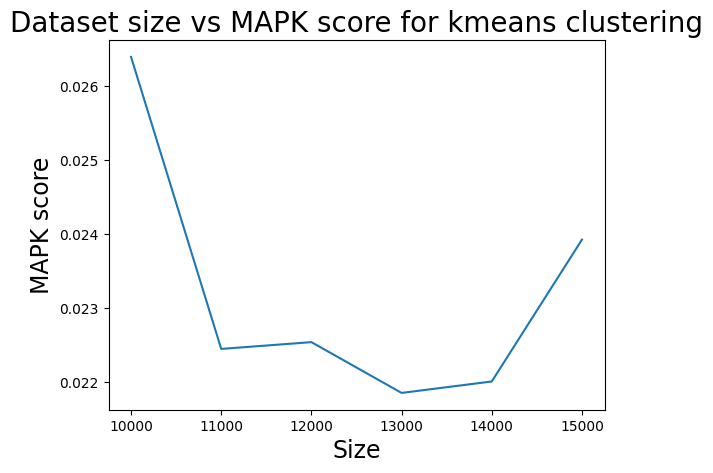

In [19]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset size vs MAPK score for kmeans clustering",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK score",fontsize=17)
plt.show()